In [1]:
from astropy.io import fits
from astropy.table import Table
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u

sns.set()

In [2]:
def reading_in_tile(tile_number):
    
    fits_image_filename = fits.open("/Users/matt/Desktop/DESI_Research/Intro_to_fits/" + tile_number +  "")
    hdul = fits_image_filename
    
    data1 = hdul["FIBERASSIGN"].data
    data2 = hdul["POTENTIAL"].data
    
    DESI_target_1 = data1.field("DESI_TARGET")
    BGS_target_1 = data1.field("BGS_TARGET")
    MWS_target_1 = data1.field("MWS_TARGET")
    RA_1 = data1.field("TARGET_RA")
    DEC_1 = data1.field("TARGET_DEC")

    
    return DESI_target_1, BGS_target_1, MWS_target_1, RA_1, DEC_1

In [3]:
DESI_01165, BGS_01165, MWS_01165, RA_01165, DEC_01165 = reading_in_tile("tile_01165.fits")

DESI_06927, BGS_06927, MWS_06927, RA_06927, DEC_06927 = reading_in_tile("tile_06927.fits")

DESI_11108, BGS_11108, MWS_11108, RA_11108, DEC_11108 = reading_in_tile("tile_11108.fits")

DESI_16870, BGS_16870, MWS_16870, RA_16870, DEC_16870 = reading_in_tile("tile_16870.fits")

DESI_18465, BGS_18465, MWS_18465, RA_18465, DEC_18465 = reading_in_tile("tile_18465.fits")

DESI_24227, BGS_24227, MWS_24227, RA_24227, DEC_24227 = reading_in_tile("tile_24227.fits")

DESI_28408, BGS_28408, MWS_28408, RA_28408, DEC_28408 = reading_in_tile("tile_28408.fits")

DESI_34170, BGS_34170, MWS_34170, RA_34170, DEC_34170 = reading_in_tile("tile_34170.fits")

DESI_39942, BGS_39942, MWS_39942, RA_39942, DEC_39942 = reading_in_tile("tile_39942.fits")

DESI_45704, BGS_45704, MWS_45704, RA_45704, DEC_45704 = reading_in_tile("tile_45704.fits")


In [15]:
DESI1 = DESI_45704 > 0.
RA1 = RA_45704
DEC1 = DEC_45704

DESI2 = (RA1[DESI1])

print(DESI1)

[False False False ...  True  True  True]


In [5]:
def mini_tile_new(survey_name1, survey_name2, survey_name3, tile_RA, tile_DEC):
    
    new_survey_name1 = survey_name1 > 0. 
    new_survey_name2 = survey_name2 > 0.
    new_survey_name3 = survey_name3 > 0.
    cross_match_1_2 = (survey_name1 > 0.) & (survey_name2 > 0.)
    cross_match_1_3 = (survey_name1 > 0.) & (survey_name3 > 0.)
   
    new_survey_name1_RA = (tile_RA[new_survey_name1])
    new_survey_name1_DEC = (tile_DEC[new_survey_name1])
    
    new_survey_name2_RA = (tile_RA[new_survey_name2])
    new_survey_name2_DEC = (tile_DEC[new_survey_name2])
    
    new_survey_name3_RA = (tile_RA[new_survey_name3])
    new_survey_name3_DEC = (tile_DEC[new_survey_name3])
    
    cross_match_1_2_RA = (tile_RA[cross_match_1_2])
    cross_match_1_2_DEC = (tile_DEC[cross_match_1_2])
    
    
    cross_match_1_3_RA = (tile_RA[cross_match_1_3])
    cross_match_1_3_DEC = (tile_DEC[cross_match_1_3])
    
    
    return new_survey_name1_RA, new_survey_name1_DEC,\
            new_survey_name2_RA, new_survey_name2_DEC,\
            new_survey_name3_RA, new_survey_name3_DEC,\
            cross_match_1_2_RA, cross_match_1_2_DEC,\
            cross_match_1_3_RA, cross_match_1_3_DEC,


In [6]:
tile_01165 = mini_tile_new(DESI_01165, BGS_01165, MWS_01165, RA_01165, DEC_01165)
tile_06927 = mini_tile_new(DESI_06927, BGS_06927, MWS_06927, RA_06927, DEC_06927)
tile_11108 = mini_tile_new(DESI_11108, BGS_11108, MWS_11108, RA_11108, DEC_11108)
tile_16870 = mini_tile_new(DESI_16870, BGS_16870, MWS_16870, RA_16870, DEC_16870)
tile_18465 = mini_tile_new(DESI_18465, BGS_18465, MWS_18465, RA_18465, DEC_18465)
tile_24227 = mini_tile_new(DESI_24227, BGS_24227, MWS_24227, RA_24227, DEC_24227)
tile_28408 = mini_tile_new(DESI_28408, BGS_28408, MWS_28408, RA_28408, DEC_28408)
tile_34170 = mini_tile_new(DESI_34170, BGS_34170, MWS_34170, RA_34170, DEC_34170)
tile_39942 = mini_tile_new(DESI_39942, BGS_39942, MWS_39942, RA_39942, DEC_39942)
tile_45704 = mini_tile_new(DESI_45704, BGS_45704, MWS_45704, RA_45704, DEC_45704)

In [7]:
def plot_tile(tile, tileName):

    plt.figure(figsize=(10,8))
    plt.scatter(tile[0],tile[1], alpha = 0.4, color = 'blue', label ='DESI')
    plt.scatter(tile[2],tile[3], alpha = 0.4, color = 'red', label ='BGS')
    plt.scatter(tile[4],tile[5], alpha = 0.4, color = 'green', label ='MWS')
    #plt.scatter(tile[6],tile[7], alpha = 0.4, color = "black", label = "DESI/BGS Cross")
    #plt.scatter(tile[8],tile[9], alpha = 0.4, color = "magenta", label = "DESI/MWS Cross")
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.legend()
    plt.title(tileName)
    
    plt.figure(figsize=(10,8))
    
    
    

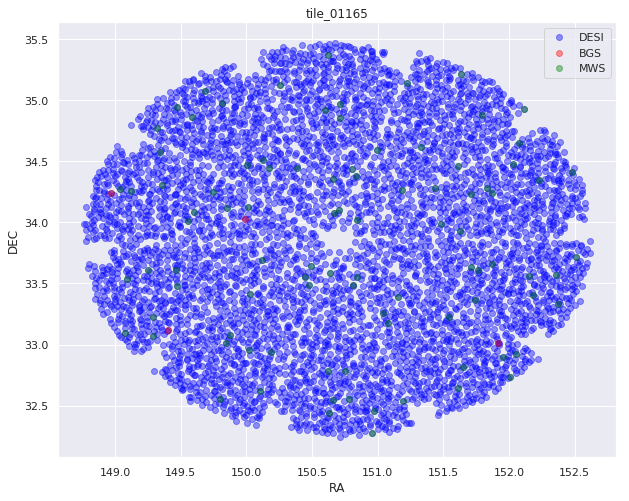

<Figure size 720x576 with 0 Axes>

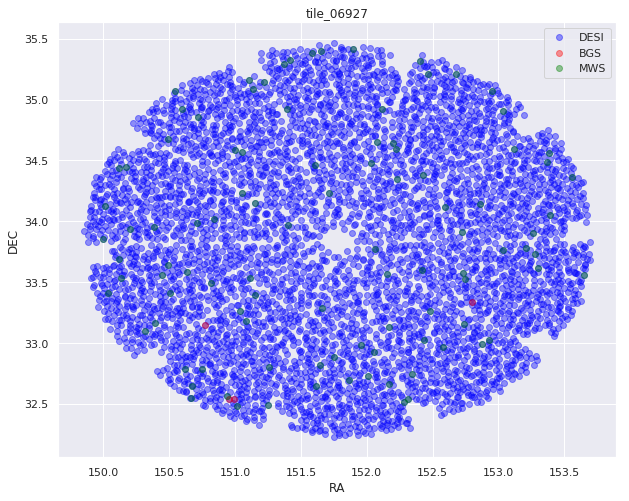

<Figure size 720x576 with 0 Axes>

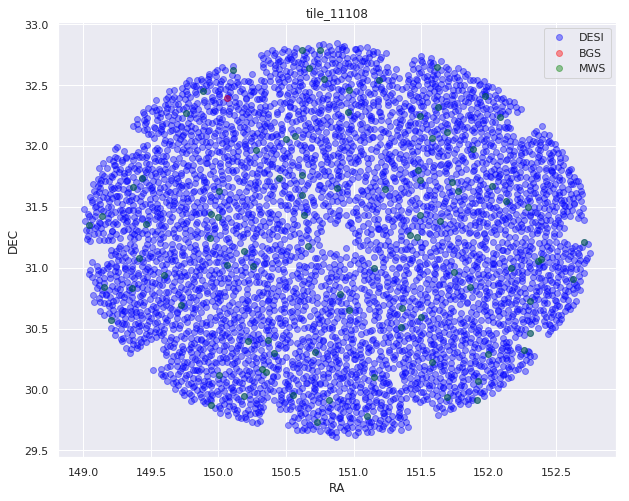

<Figure size 720x576 with 0 Axes>

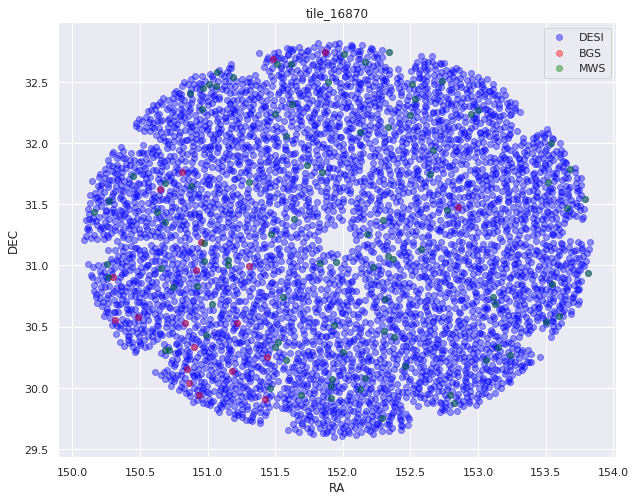

<Figure size 720x576 with 0 Axes>

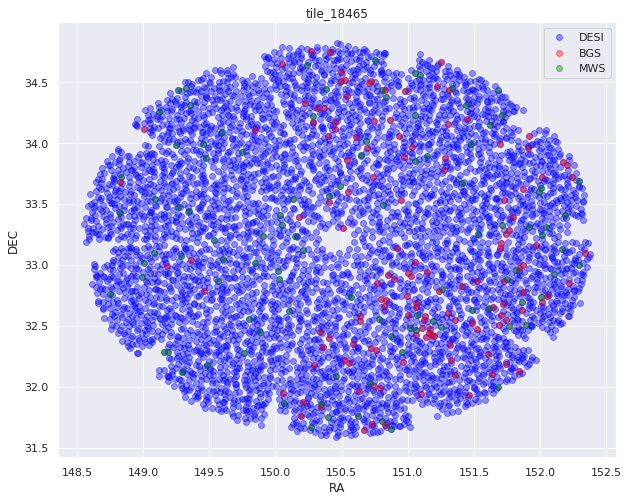

<Figure size 720x576 with 0 Axes>

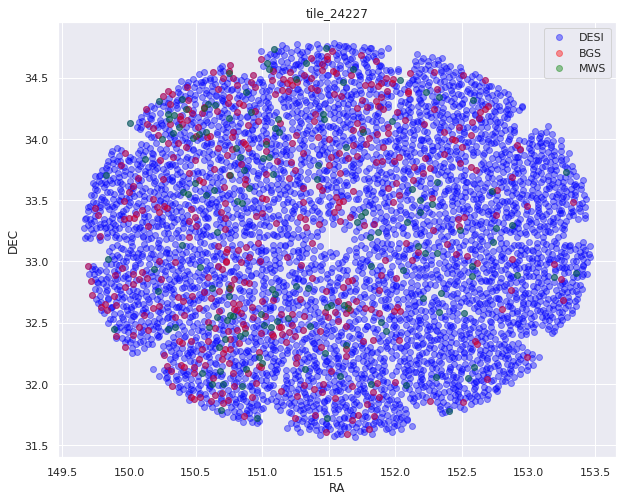

<Figure size 720x576 with 0 Axes>

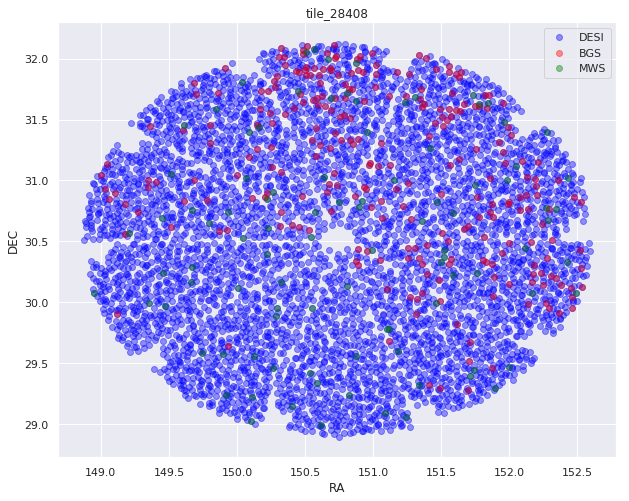

<Figure size 720x576 with 0 Axes>

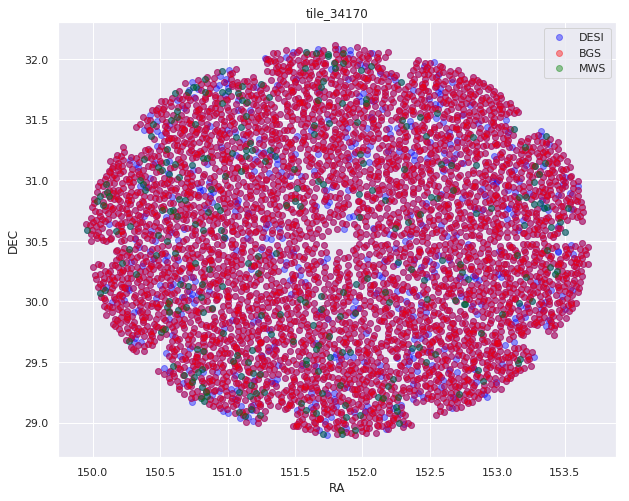

<Figure size 720x576 with 0 Axes>

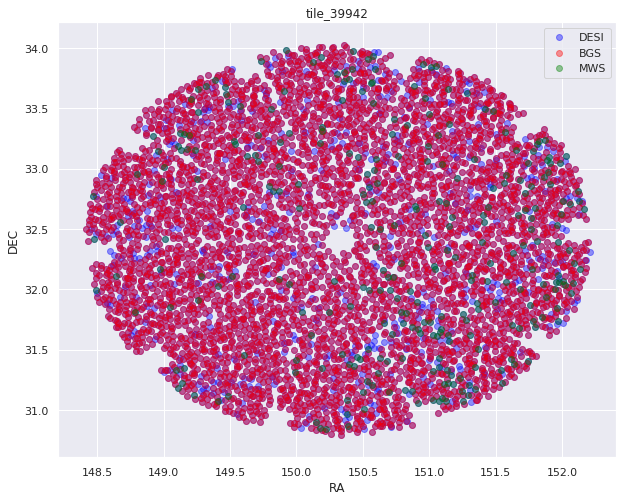

<Figure size 720x576 with 0 Axes>

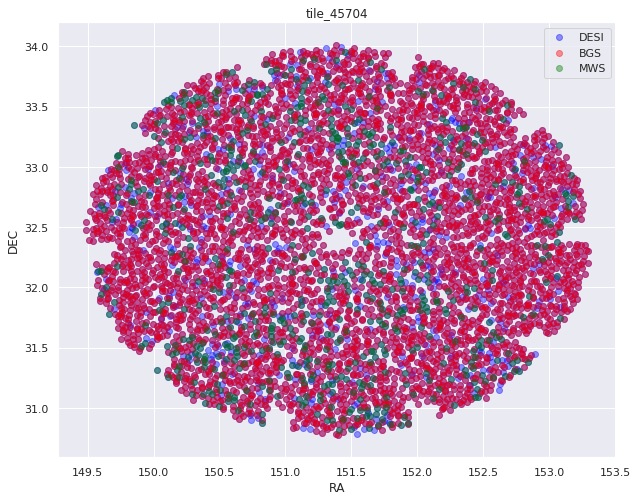

<Figure size 720x576 with 0 Axes>

In [8]:
plot_tile(tile_01165, "tile_01165")
plot_tile(tile_06927, "tile_06927")
plot_tile(tile_11108, "tile_11108")
plot_tile(tile_16870, "tile_16870")
plot_tile(tile_18465, "tile_18465")
plot_tile(tile_24227, "tile_24227")
plot_tile(tile_28408, "tile_28408")
plot_tile(tile_34170, "tile_34170")
plot_tile(tile_39942, "tile_39942")
plot_tile(tile_45704, "tile_45704")

In [9]:
def total_func_single_tile(tile):
    
    DESI_target_1, BGS_target_1, MWS_target_1, RA_1, DEC_1 = reading_in_tile(tile)
    
    tile = mini_tile_new(DESI_target_1, BGS_target_1, MWS_target_1, RA_1, DEC_1)
    
    plot_tile(tile, "tile_06927")

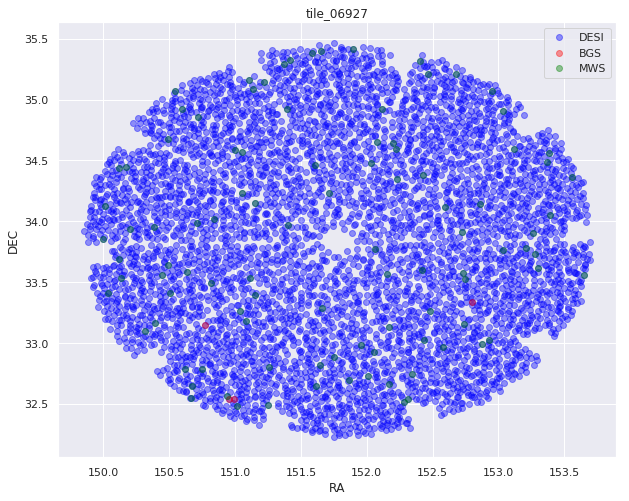

<Figure size 720x576 with 0 Axes>

In [10]:
total_func_single_tile("tile_06927.fits")

In [11]:
def total_func1(tile, tile_string):
    
    for i in len(tile)
    
    
    
    DESI_target_1, BGS_target_1, MWS_target_1, RA_1, DEC_1 = reading_in_tile(tile)
    
    tile = mini_tile_new(DESI_target_1, BGS_target_1, MWS_target_1, RA_1, DEC_1)
    
    plot_tile(tile, tile_string)

SyntaxError: invalid syntax (<ipython-input-11-c30d1c9d1761>, line 3)

In [ ]:
plot_tile(tile_01165, "tile_01165")
plot_tile(tile_06927, "tile_06927")
plot_tile(tile_11108, "tile_11108")
plot_tile(tile_16870, "tile_16870")
plot_tile(tile_18465, "tile_18465")
plot_tile(tile_24227, "tile_24227")
plot_tile(tile_28408, "tile_28408")
plot_tile(tile_34170, "tile_34170")
plot_tile(tile_39942, "tile_39942")
plot_tile(tile_45704, "tile_45704")

In [ ]:
tile_string = ("tile_06927", "tile_06927", "tile_11108", "tile_16870", "tile_18465", "tile_24227", "tile_28408", "tile_34170",\
              "tile_39942", "tile_45704")

In [ ]:
total_func1("tile_06927.fits", tile_string)